### 1 - Entendimento do Projeto e Importação dos Dados

---

#### Descrição:
- [x] Leia o enunciado do projeto e compreenda o contexto de negócio.
- [x] Carregue o arquivo `healthcare_dataset.csv` utilizando a biblioteca `pandas`.
- [x] Realize uma exploração inicial (5 primeiras linhas, tipos de dados e dimensões).

#### Objetivo:
Compreender a estrutura do dataset e preparar o ambiente de trabalho.

#### Dicas Técnicas:
- Use `import pandas as pd`
- `df = pd.read_csv('healthcare_dataset.csv')`
- `df.head()`
- `df.info()`
- `df.describe()`

---

In [194]:
import pandas as pd
import numpy as np

df_healthcare = pd.read_csv(r'C:\Codigos\M1S07\datasets\healthcare_dataset.csv')

df_healthcare.info()
df_healthcare.describe().round(2)
df_healthcare.shape[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

55500

### 2 - Limpeza e Preparação dos Dados

---

#### Descrição:
- [x] Verifique e trate valores ausentes (`NA`, `NaN`).
- [x] Remova registros duplicados, se existirem.
- [x] Identifique outliers em colunas numéricas relevantes (ex.: idade, custo, tempo de internação).
- [x] Padronize inconsistências em colunas categóricas (ex.: `Male`, `male`, `M`).

#### Objetivo:
Garantir que os dados estejam consistentes e prontos para análise.

#### Entregas Esperadas:
- Um dataset limpo (`df_clean`).
- Comentários no notebook explicando as decisões tomadas.

#### Dicas Técnicas:
- Use `df.isna().sum()` e `df.dropna()` / `df.fillna()` conforme o caso.
- `df.duplicated()` e `df.drop_duplicates()` para duplicados.
- Visualize outliers com boxplot e use IQR ou z-score para tratamento.
- Padronize categorias com `str.lower().str.strip()` ou `map()`.

---

In [195]:
# Registros nulos/NA : 0
# Então nada foi feito
df_healthcare.isnull().sum()

# Registros duplicados : 534
df_healthcare.duplicated().sum()

# Remover duplicados
df_healthcare.drop_duplicates(inplace=True)
df_healthcare.duplicated().sum()

np.int64(0)

In [196]:
# Funções de normalização e remoção de outliers

# Função para remover outliers usando o método de Tukey
def remover_outliers_tukey(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[
        (df[coluna] >= limite_inferior) &
        (df[coluna] <= limite_superior)
    ]

# Função para normalizar colunas genericas com um map
def normalize_generic(val, mapping=None):
    if pd.isna(val):
        return val

    s = str(val).strip().lower()
    if mapping:
        return mapping.get(s, val)
    return s

# Função para normalizar os nomes
import re
def normalize_name(name):
    if pd.isna(name):
        return name

    s = str(name).strip().lower()
    parts = re.split(r"(\s+|-|')", s)
    return ''.join(p.capitalize() if not re.match(r"(\s+|-|')", p) else p for p in parts)


In [197]:
# Criação da coluna 'length_of_stay'

df_healthcare['Lenght of Stay (days)'] = (pd.to_datetime(df_healthcare['Discharge Date']) - pd.to_datetime(df_healthcare['Date of Admission'])).dt.days

# Remover outliers de colunas numericas relevantes

df_healthcare = remover_outliers_tukey(df_healthcare, 'Age')
df_healthcare = remover_outliers_tukey(df_healthcare, 'Billing Amount')
df_healthcare = remover_outliers_tukey(df_healthcare, 'Lenght of Stay (days)')

df_healthcare.shape[0]

54966

In [198]:
# Mapeamento das possibilidades para fazer a normalização

blood_map = {
    'a+': 'A+', 'a positive': 'A+', 'a-': 'A-',
    'b+': 'B+', 'b positive': 'B+', 'b-': 'B-',
    'ab+': 'AB+', 'ab-': 'AB-',
    'o+': 'O+', 'o-': 'O-'
}

admission_map = {
    'emergency': 'Emergency', 'urgent': 'Urgent', 'elective': 'Elective',
    'e': 'Emergency', 'urg': 'Urgent', 'elec': 'Elective'
}

test_map = {
    'pos': 'Positive', 'positive': 'Positive',
    'neg': 'Negative', 'negative': 'Negative'
}

insurance_map = {
    'medicare': 'Medicare', 'medi-care': 'Medicare',
    'blue cross': 'Blue Cross', 'bcbs': 'Blue Cross'
}

In [199]:
# Normalização das colunas categóricas

df_healthcare['Blood Type'] = df_healthcare['Blood Type'].apply(lambda x: normalize_generic(x, blood_map))
df_healthcare['Admission Type'] = df_healthcare['Admission Type'].apply(lambda x: normalize_generic(x, admission_map))
df_healthcare['Test Results'] = df_healthcare['Test Results'].apply(lambda x: normalize_generic(x, test_map))
df_healthcare['Insurance Provider'] = df_healthcare['Insurance Provider'].apply(lambda x: normalize_generic(x, insurance_map))

# Normalização da coluna dos nomes

df_healthcare['Name'] = df_healthcare['Name'].apply(normalize_name)

### 3 - Análise Exploratória e Estatísticas Descritivas

---

#### Descrição:
- [x] Calcule média, mediana e desvio padrão de variáveis numéricas.
- [x] Gere distribuição de frequências para variáveis categóricas.
- [x] Identifique correlações entre variáveis (ex.: idade x custo).
- [x] Faça agregações com `groupby` (ex.: média de custo por tipo de tratamento).

#### Objetivo:
Obter entendimento estatístico e padrões iniciais no dataset.

#### Dicas Técnicas:
- Use `df.describe()` e `df.select_dtypes()` para resumo.
- `df.groupby(['col']).agg({'col2': ['mean','median']})`.
- `df['cat'].value_counts(normalize=False)` para frequências.
- `df.corr()` e `seaborn.heatmap()` para correlações.

---

In [200]:
df_healthcare.describe().round(2)

,Age,Billing Amount,Room Number,Lenght of Stay (days)
count,54966.00,54966.00,54966.00,54966.00
mean,51.54,25544.31,301.12,15.50
std,19.61,14208.41,115.22,8.66
min,13.00,-2008.49,101.00,1.00
25%,35.00,13243.72,202.00,8.00
50%,52.00,25542.75,302.00,15.00
75%,68.00,37819.86,401.00,23.00
max,89.00,52764.28,500.00,30.00


In [201]:
# Frequência de 'Gender', 'Blood Type', 'Insurance Provider', 'Admission Type', 'Test Result'

df_healthcare['Gender'].value_counts(normalize=False)
df_healthcare['Blood Type'].value_counts(normalize=False)
df_healthcare['Insurance Provider'].value_counts(normalize=False)
df_healthcare['Admission Type'].value_counts(normalize=False)
df_healthcare['Test Results'].value_counts(normalize=False)



Test Results
Abnormal        18437
Normal          18331
Inconclusive    18198
Name: count, dtype: int64

In [202]:
df_healthcare[['Age', 'Billing Amount']].corr()
df_healthcare[['Age', 'Lenght of Stay (days)']].corr()

# Estatísticas por doença
df_healthcare.groupby('Medical Condition')['Lenght of Stay (days)'] \
    .agg(count='count', mean='mean', median='median').round(2)

df_healthcare.groupby('Medical Condition')['Age'] \
    .agg(count='count', mean='mean', median='median').round(2)

df_healthcare.groupby('Age')['Lenght of Stay (days)'] \
    .agg(count='count', mean='mean', median='median').round(2)

df_healthcare.groupby('Medical Condition')['Billing Amount'] \
    .agg(count='count', mean='mean', median='median').round(2)

,count,mean,median
Medical Condition,,,
Arthritis,9218,25511.78,25599.18
Asthma,9095,25633.46,25628.41
Cancer,9140,25152.32,24910.71
Diabetes,9216,25660.48,25647.71
Hypertension,9151,25503.06,25281.63
Obesity,9146,25804.36,26145.58


### 4 - Transformações e Enriquecimento dos Dados

---

#### Descrição:
- [x] Crie novas colunas derivadas (ex.: faixas etárias).
- [x] Normalize variáveis monetárias ou de tempo, se necessário.
- [x] Aplique transformações para facilitar modelagem/visualização.

#### Objetivo:
Enriquecer o dataset com features úteis e padronizar escalas.

#### Dicas Técnicas:
- Use `df['nova'] = df['idade'].apply(lambda x: ...)` para novas colunas.
- Normalização: `MinMaxScaler` ou `StandardScaler` (scikit-learn) ou operações manuais.
- Considere `pd.to_datetime()` para datas e extração de componentes (ano, mês, dia).

---

In [203]:
# Criando colunas derivadas

df_healthcare['Age Range'] = df_healthcare['Age'].apply(lambda x: 'Children' if x < 18 else 'Adult')
df_healthcare['Cost p Day'] = (df_healthcare['Billing Amount'] / df_healthcare['Lenght of Stay (days)']).round(2)

In [204]:
# Criar coluna com dia da semana 'Date of Admission'
df_healthcare['Date of Admission'] = pd.to_datetime(df_healthcare['Date of Admission'], errors='coerce')
df_healthcare['admission_weekday'] = df_healthcare['Date of Admission'].dt.day_name()
df_healthcare['admission_is_weekend'] = df_healthcare['Date of Admission'].dt.weekday.isin([5, 6])


In [205]:
from sklearn.preprocessing import MinMaxScaler

cols = ['Billing Amount', 'Lenght of Stay (days)', 'Cost p Day']

# Limpar e converter 'Billing Amount' para numérico
df_healthcare['Billing Amount'] = (
    df_healthcare['Billing Amount']
    .astype(str)
    .str.replace(r'[^\d\.\-\,]', '', regex=True)
    .str.replace(',', '', regex=False)
    .replace('', np.nan)
)
df_healthcare['Billing Amount'] = pd.to_numeric(df_healthcare['Billing Amount'], errors='coerce')

# Garantir os outros campos como numéricos
df_healthcare['Lenght of Stay (days)'] = pd.to_numeric(df_healthcare['Lenght of Stay (days)'], errors='coerce')
df_healthcare['Cost p Day'] = pd.to_numeric(df_healthcare['Cost p Day'], errors='coerce')

# Preencher NaN com mediana somente nas colunas selecionadas e escalar
df_fill = df_healthcare[cols].fillna(df_healthcare[cols].median())

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df_fill)

# Adicionar colunas com sufixo _minmax
for i, col in enumerate(cols):
    df_healthcare[f"{col}_minmax"] = scaled[:, i]

### 5 - Visualização dos Dados

---

#### Descrição:
- [x] Construa gráficos que respondam perguntas de negócio (faixa etária x custo, diferença por gênero, regiões).
- [x] Inclua visualizações claras e comentadas.

#### Objetivo:
Comunicar insights visuais que sustentem decisões.

#### Gráficos Sugeridos:
- Gráfico de barras para custos médios por tipo de tratamento.
- Gráfico de dispersão (scatter) entre idade e custo.
- Gráfico de pizza ou barras com proporção de pacientes por região.
- Boxplots para comparar distribuição de custo entre grupos.

#### Dicas Técnicas:
- Use `matplotlib` e `seaborn` (`sns.barplot`, `sns.scatterplot`, `sns.boxplot`).
- Sempre rotule e legendas (`xlabel`, `ylabel`, `title`) e salve figuras em `data/figures/`.

---

CALCULANDO ESTATÍSTICAS PARA O RELATÓRIO

1) Correlação Idade × Custo: r = -0.0034 (MUITO FRACA (praticamente inexistente))
2) Diferença Emergency vs Elective: -0.42%

3) Distribuição etária:
   Adult: 99.79%
   Children: 0.21%

4) Diferença de custo Adult vs Children: -15.02%
5) Diferença entre gêneros: 0.55%




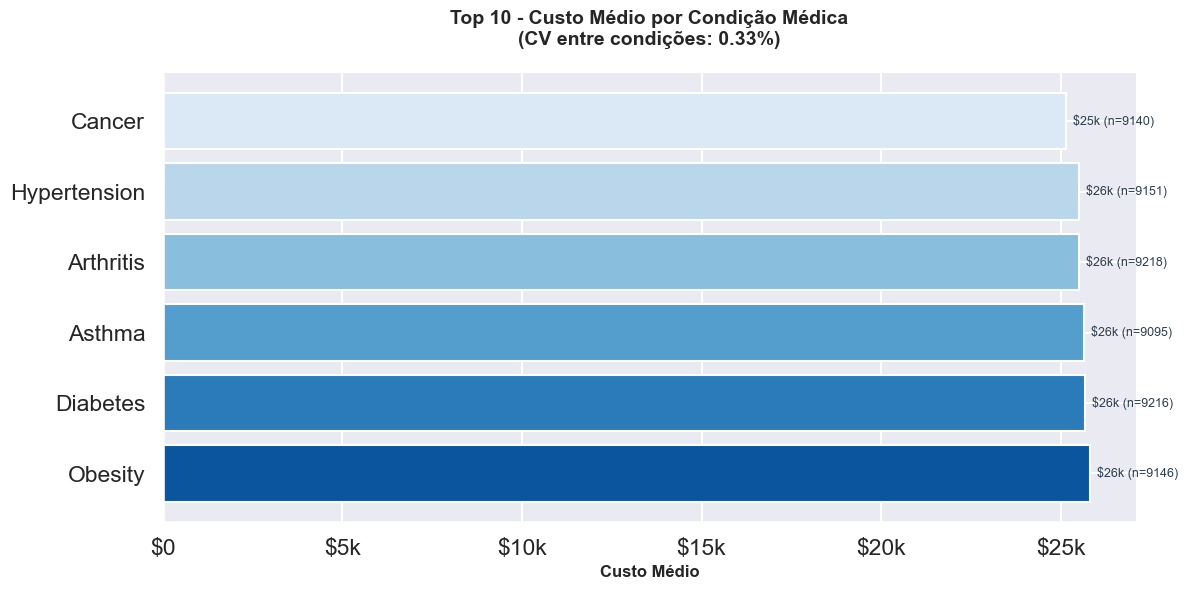

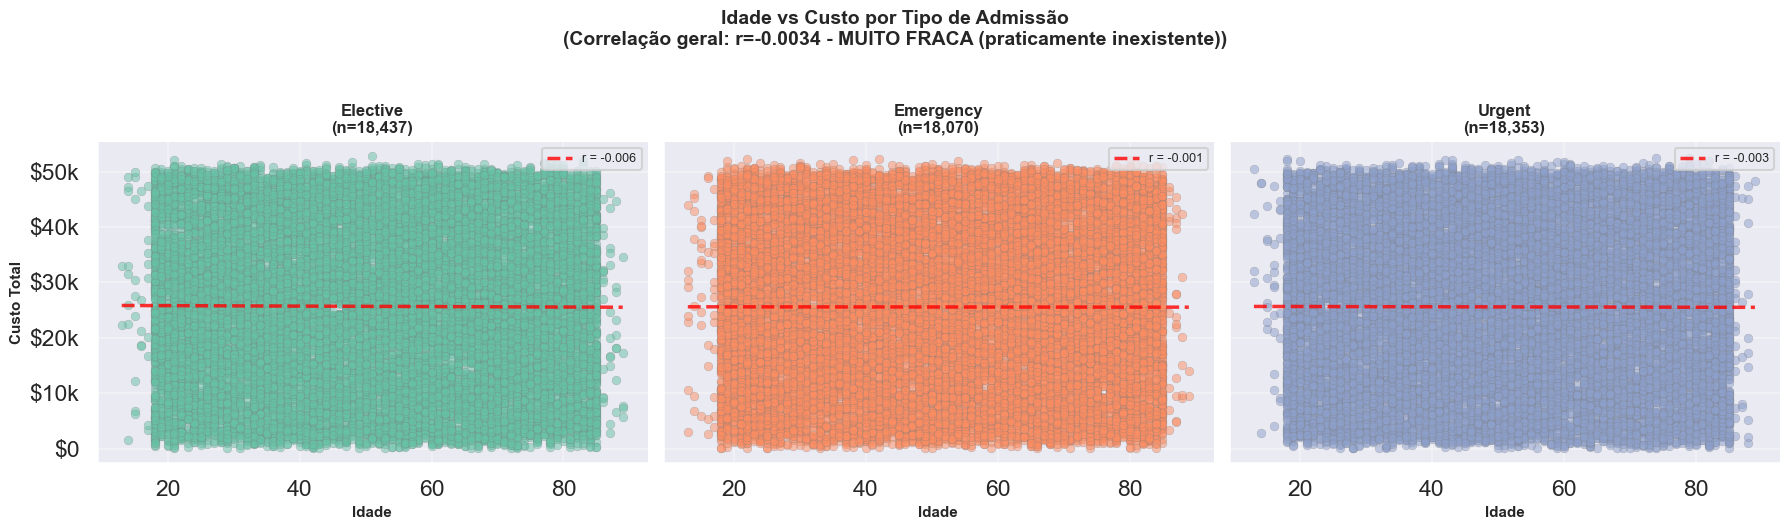

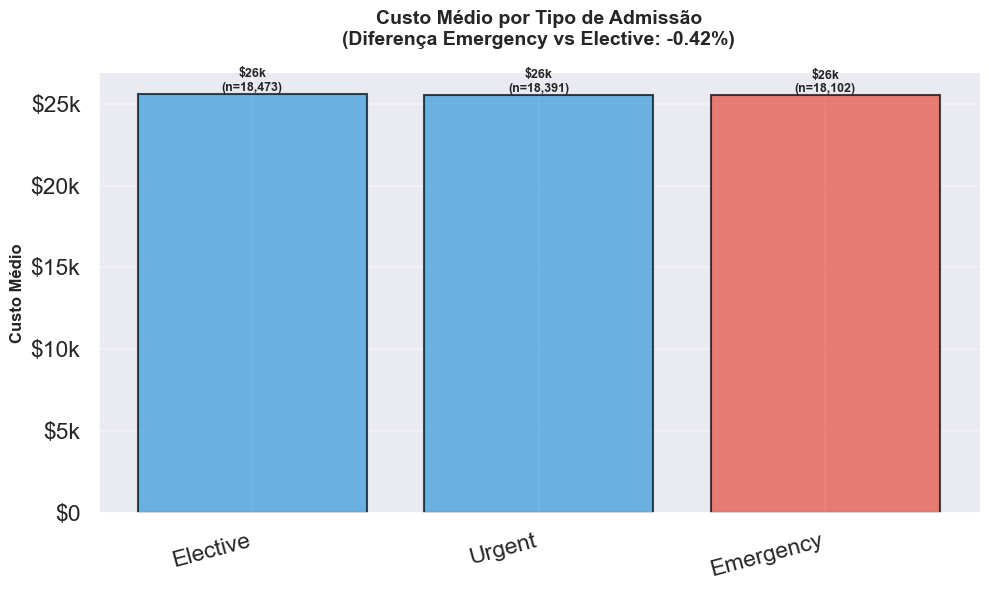

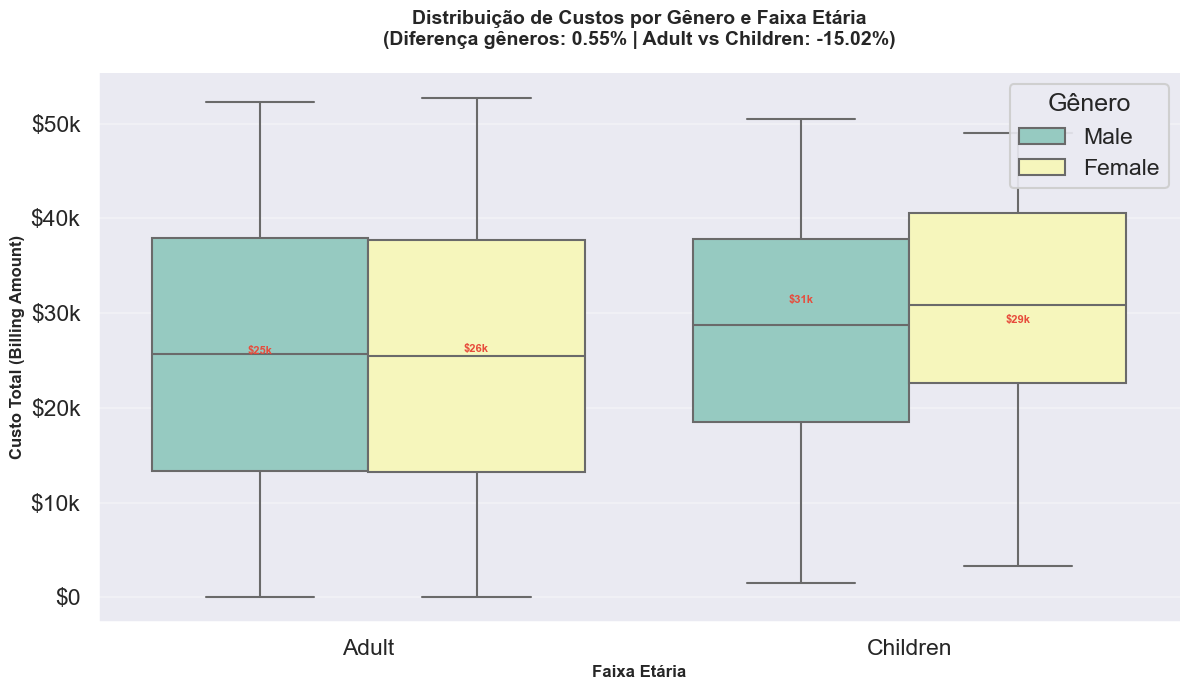

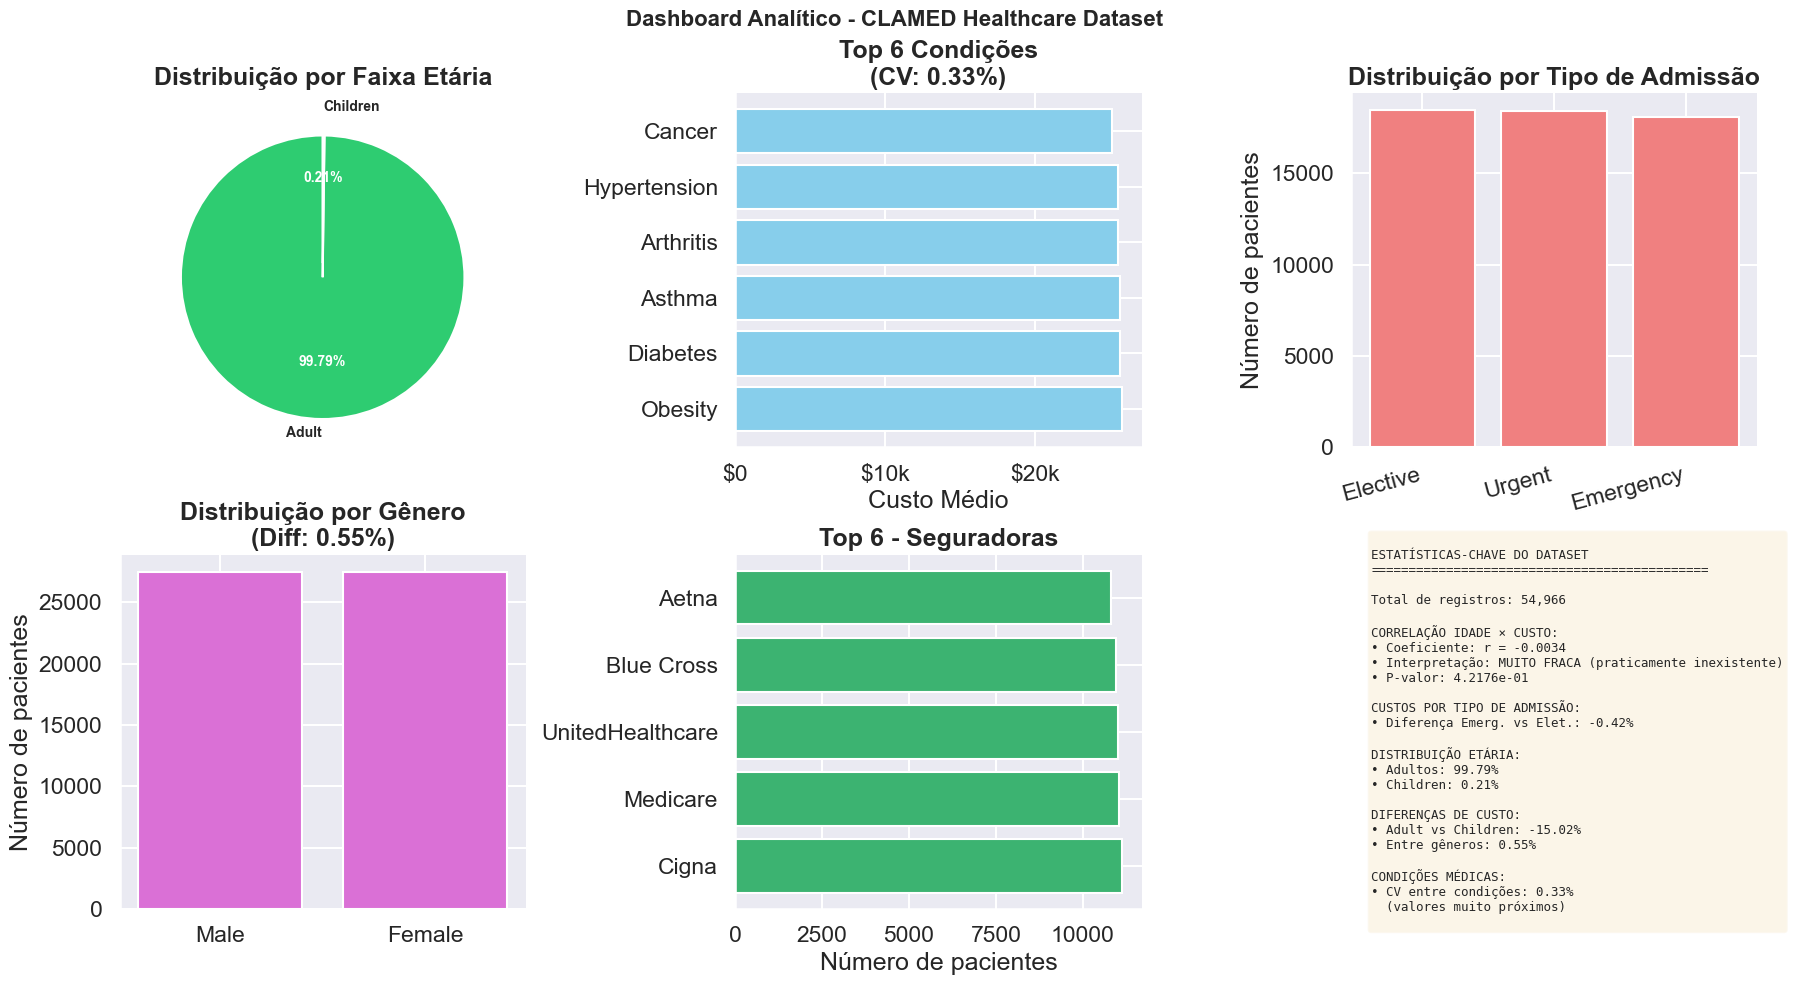

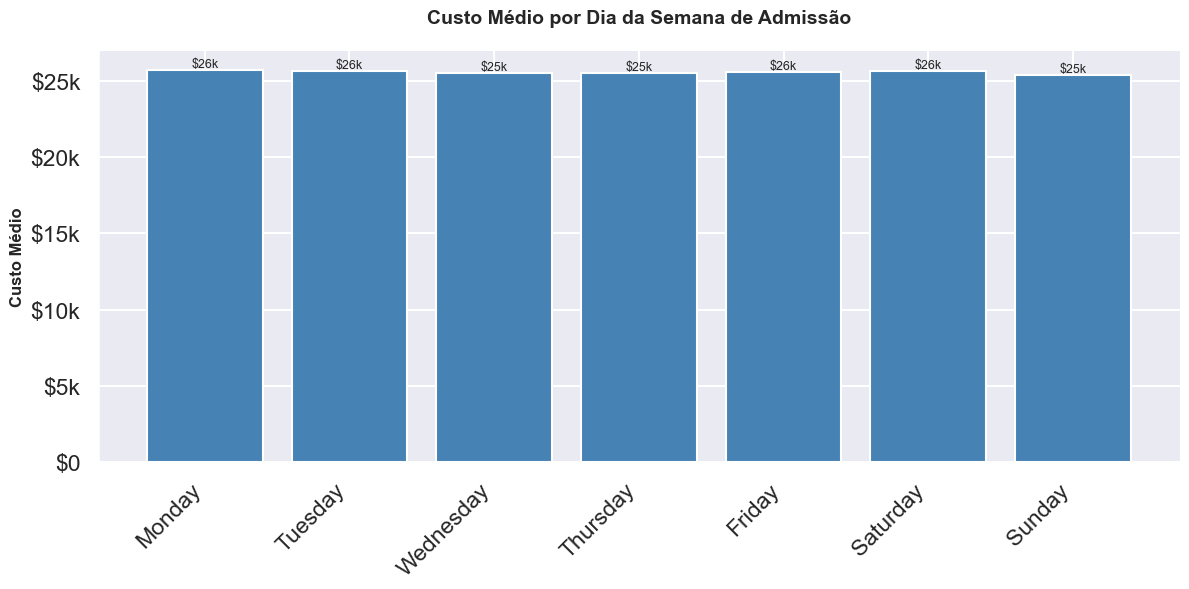

✓ Todas as visualizações foram geradas com estatísticas validadas!


In [206]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter
from scipy.stats import pearsonr

# Formatador monetário
def fmt_currency(x, pos=None):
    if np.isnan(x):
        return ''
    if abs(x) >= 1_000_000:
        return f'${x/1_000_000:.1f}M'
    if abs(x) >= 1_000:
        return f'${x/1_000:.0f}k'
    return f'${x:,.0f}'

currency_fmt = FuncFormatter(fmt_currency)

# ============================================================================
# CÁLCULOS ESTATÍSTICOS PRELIMINARES
# ============================================================================
print("="*80)
print("CALCULANDO ESTATÍSTICAS PARA O RELATÓRIO")
print("="*80)

# 1) Correlação Idade × Custo
df_corr = df_healthcare[['Age', 'Billing Amount']].dropna()
corr_coef, p_value = pearsonr(df_corr['Age'], df_corr['Billing Amount'])

if abs(corr_coef) < 0.1:
    interpretacao = "MUITO FRACA (praticamente inexistente)"
elif abs(corr_coef) < 0.3:
    interpretacao = "FRACA"
elif abs(corr_coef) < 0.7:
    interpretacao = "MODERADA"
else:
    interpretacao = "FORTE"

print(f"\n1) Correlação Idade × Custo: r = {corr_coef:.4f} ({interpretacao})")

# 2) Diferença Emergency vs Elective
df_admission = df_healthcare[['Admission Type', 'Billing Amount']].dropna()
custo_por_tipo = df_admission.groupby('Admission Type')['Billing Amount'].mean()

diferenca_pct = 0
if 'Emergency' in custo_por_tipo.index and 'Elective' in custo_por_tipo.index:
    diferenca_pct = ((custo_por_tipo['Emergency'] - custo_por_tipo['Elective']) /
                     custo_por_tipo['Elective']) * 100
    print(f"2) Diferença Emergency vs Elective: {diferenca_pct:+.2f}%")

# 3) Distribuição Adultos vs Children
age_distribution = df_healthcare['Age Range'].value_counts()
total_records = len(df_healthcare)
print(f"\n3) Distribuição etária:")
for cat, count in age_distribution.items():
    pct = (count / total_records) * 100
    print(f"   {cat}: {pct:.2f}%")

# 4) Diferença de custos entre faixas etárias
stats_idade = df_healthcare.groupby('Age Range')['Billing Amount'].median()
diff_idade_pct = 0
if 'Adult' in stats_idade.index and 'Children' in stats_idade.index:
    diff_idade_pct = ((stats_idade['Adult'] - stats_idade['Children']) /
                      stats_idade['Children']) * 100
    print(f"\n4) Diferença de custo Adult vs Children: {diff_idade_pct:+.2f}%")

# 5) Diferença entre gêneros
stats_gender = df_healthcare.groupby('Gender')['Billing Amount'].mean()
diff_gender_pct = 0
if len(stats_gender) == 2:
    diff_gender_pct = abs((stats_gender.iloc[0] - stats_gender.iloc[1]) /
                          stats_gender.mean()) * 100
    print(f"5) Diferença entre gêneros: {diff_gender_pct:.2f}%")

print("\n" + "="*80 + "\n")

# ============================================================================
# 1) CUSTO MÉDIO POR MEDICAL CONDITION (Top 10) + ESTATÍSTICAS
# ============================================================================
cost_by_condition = (
    df_healthcare[['Medical Condition', 'Billing Amount']]
    .dropna()
    .groupby('Medical Condition')['Billing Amount']
    .agg(['mean', 'count', 'std'])
    .sort_values('mean', ascending=False)
    .head(10)
)

# Calcular coeficiente de variação
cv_conditions = (cost_by_condition['std'].std() / cost_by_condition['mean'].mean()) * 100

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(
    range(len(cost_by_condition)),
    cost_by_condition['mean'].values,
    color=sns.color_palette('Blues_r', len(cost_by_condition))
)
ax.set_yticks(range(len(cost_by_condition)))
ax.set_yticklabels(cost_by_condition.index)
ax.xaxis.set_major_formatter(currency_fmt)
ax.set_xlabel('Custo Médio', fontsize=12, fontweight='bold')
ax.set_title(f'Top 10 - Custo Médio por Condição Médica\n(CV entre condições: {cv_conditions:.2f}%)',
             fontsize=14, fontweight='bold', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Anotações com valores + contagem
for i, idx in enumerate(cost_by_condition.index):
    val = cost_by_condition.loc[idx, 'mean']
    count = int(cost_by_condition.loc[idx, 'count'])
    ax.text(val, i, f'  {fmt_currency(val)} (n={count})',
            va='center', ha='left', fontsize=9, color='#2c3e50')

plt.tight_layout()
plt.savefig('data/figures/relatorio_fig1_custo_por_condicao.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# ============================================================================
# 2) SCATTER IDADE × CUSTO COM CORRELAÇÃO DESTACADA
# ============================================================================
df_scatter = df_healthcare[['Age', 'Billing Amount', 'Admission Type']].dropna()
df_scatter = df_scatter[df_scatter['Billing Amount'] > 0]

admission_types = sorted(df_scatter['Admission Type'].unique())
n_types = len(admission_types)

fig, axes = plt.subplots(1, n_types, figsize=(6*n_types, 5), sharey=True)
if n_types == 1:
    axes = [axes]

for idx, adm_type in enumerate(admission_types):
    ax = axes[idx]
    subset = df_scatter[df_scatter['Admission Type'] == adm_type]

    # Calcular correlação específica
    corr_subset, p_subset = pearsonr(subset['Age'], subset['Billing Amount'])

    # Scatter
    ax.scatter(
        subset['Age'],
        subset['Billing Amount'],
        alpha=0.5,
        s=40,
        color=sns.color_palette('Set2')[idx % 8],
        edgecolors='gray',
        linewidth=0.3
    )

    # Linha de tendência
    z = np.polyfit(subset['Age'], subset['Billing Amount'], 1)
    p = np.poly1d(z)
    age_sorted = np.sort(subset['Age'])
    ax.plot(age_sorted, p(age_sorted), '--', color='red', linewidth=2.5, alpha=0.8,
            label=f'r = {corr_subset:.3f}')

    ax.set_xlabel('Idade', fontsize=11, fontweight='bold')
    if idx == 0:
        ax.set_ylabel('Custo Total', fontsize=11, fontweight='bold')
    ax.set_title(f'{adm_type}\n(n={len(subset):,})', fontsize=12, fontweight='bold')
    ax.yaxis.set_major_formatter(currency_fmt)
    ax.legend(loc='upper right', fontsize=9)
    ax.grid(alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle(f'Idade vs Custo por Tipo de Admissão\n(Correlação geral: r={corr_coef:.4f} - {interpretacao})',
             fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.savefig('data/figures/relatorio_fig2_idade_vs_custo.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# ============================================================================
# 3) COMPARAÇÃO EMERGENCY VS ELECTIVE
# ============================================================================
df_admission_stats = (
    df_healthcare[['Admission Type', 'Billing Amount']]
    .dropna()
    .groupby('Admission Type')['Billing Amount']
    .agg(['mean', 'median', 'count'])
    .sort_values('mean', ascending=False)
)

fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#e74c3c' if 'Emergency' in x else '#3498db'
          for x in df_admission_stats.index]

bars = ax.bar(
    range(len(df_admission_stats)),
    df_admission_stats['mean'],
    color=colors,
    alpha=0.7,
    edgecolor='black',
    linewidth=1.5
)

ax.set_xticks(range(len(df_admission_stats)))
ax.set_xticklabels(df_admission_stats.index, rotation=15, ha='right')
ax.yaxis.set_major_formatter(currency_fmt)
ax.set_ylabel('Custo Médio', fontsize=12, fontweight='bold')

# Destacar diferença Emergency vs Elective
if 'Emergency' in df_admission_stats.index and 'Elective' in df_admission_stats.index:
    title_extra = f'\n(Diferença Emergency vs Elective: {diferenca_pct:+.2f}%)'
else:
    title_extra = ''

ax.set_title(f'Custo Médio por Tipo de Admissão{title_extra}',
             fontsize=14, fontweight='bold', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(axis='y', alpha=0.3)

# Anotações
for i, idx in enumerate(df_admission_stats.index):
    val = df_admission_stats.loc[idx, 'mean']
    count = int(df_admission_stats.loc[idx, 'count'])
    ax.text(i, val, f'{fmt_currency(val)}\n(n={count:,})',
            ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig('data/figures/relatorio_fig3_emergency_vs_elective.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# ============================================================================
# 4) BOXPLOT - CUSTO POR GÊNERO E FAIXA ETÁRIA (COM ESTATÍSTICAS)
# ============================================================================
df_box = df_healthcare[['Gender', 'Age Range', 'Billing Amount']].dropna()
df_box = df_box[df_box['Billing Amount'] > 0]

fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(
    data=df_box,
    x='Age Range',
    y='Billing Amount',
    hue='Gender',
    palette='Set3',
    ax=ax,
    linewidth=1.5,
    fliersize=3
)

ax.yaxis.set_major_formatter(currency_fmt)
ax.set_xlabel('Faixa Etária', fontsize=12, fontweight='bold')
ax.set_ylabel('Custo Total (Billing Amount)', fontsize=12, fontweight='bold')

# Adicionar info de diferenças no título
title_stats = f'Distribuição de Custos por Gênero e Faixa Etária\n'
title_stats += f'(Diferença gêneros: {diff_gender_pct:.2f}% | '
title_stats += f'Adult vs Children: {diff_idade_pct:+.2f}%)'

ax.set_title(title_stats, fontsize=14, fontweight='bold', pad=20)
ax.legend(title='Gênero', loc='upper right', framealpha=0.9)
ax.grid(axis='y', alpha=0.3)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adicionar medianas
for i, age_range in enumerate(sorted(df_box['Age Range'].unique())):
    for j, gender in enumerate(sorted(df_box['Gender'].unique())):
        subset = df_box[(df_box['Age Range'] == age_range) & (df_box['Gender'] == gender)]
        if not subset.empty:
            median = subset['Billing Amount'].median()
            x_pos = i + (j - 0.5) * 0.4
            ax.text(x_pos, median, f'{fmt_currency(median)}',
                   ha='center', va='bottom', fontsize=8, color='#e74c3c', fontweight='bold')

plt.tight_layout()
plt.savefig('data/figures/relatorio_fig4_custo_genero_idade.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# ============================================================================
# 5) DASHBOARD RESUMO COM ESTATÍSTICAS-CHAVE
# ============================================================================
fig = plt.figure(figsize=(18, 10))

# 1) Pizza - Distribuição etária
ax1 = plt.subplot(2, 3, 1)
colors_age = ['#2ecc71', '#f39c12']
wedges, texts, autotexts = ax1.pie(
    age_distribution.values,
    labels=age_distribution.index,
    autopct='%1.2f%%',
    colors=colors_age,
    startangle=90,
    textprops={'fontsize': 10, 'fontweight': 'bold'},
    explode=[0.05] * len(age_distribution)
)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
ax1.set_title('Distribuição por Faixa Etária', fontweight='bold')

# 2) Barras - Top 6 condições
ax2 = plt.subplot(2, 3, 2)
top_6_cond = cost_by_condition.head(6)
ax2.barh(range(len(top_6_cond)), top_6_cond['mean'], color='skyblue')
ax2.set_yticks(range(len(top_6_cond)))
ax2.set_yticklabels(top_6_cond.index)
ax2.xaxis.set_major_formatter(currency_fmt)
ax2.set_xlabel('Custo Médio')
ax2.set_title(f'Top 6 Condições\n(CV: {cv_conditions:.2f}%)', fontweight='bold')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# 3) Barras - Tipos de admissão
ax3 = plt.subplot(2, 3, 3)
adm_counts = df_healthcare['Admission Type'].value_counts()
ax3.bar(range(len(adm_counts)), adm_counts.values, color='lightcoral')
ax3.set_xticks(range(len(adm_counts)))
ax3.set_xticklabels(adm_counts.index, rotation=15, ha='right')
ax3.set_ylabel('Número de pacientes')
ax3.set_title('Distribuição por Tipo de Admissão', fontweight='bold')
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# 4) Barras - Gênero
ax4 = plt.subplot(2, 3, 4)
gender_counts = df_healthcare['Gender'].value_counts()
ax4.bar(range(len(gender_counts)), gender_counts.values, color='orchid')
ax4.set_xticks(range(len(gender_counts)))
ax4.set_xticklabels(gender_counts.index)
ax4.set_ylabel('Número de pacientes')
ax4.set_title(f'Distribuição por Gênero\n(Diff: {diff_gender_pct:.2f}%)', fontweight='bold')
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)

# 5) Seguradoras
ax5 = plt.subplot(2, 3, 5)
insurance_counts = df_healthcare['Insurance Provider'].value_counts().head(6)
ax5.barh(range(len(insurance_counts)), insurance_counts.values, color='mediumseagreen')
ax5.set_yticks(range(len(insurance_counts)))
ax5.set_yticklabels(insurance_counts.index)
ax5.set_xlabel('Número de pacientes')
ax5.set_title('Top 6 - Seguradoras', fontweight='bold')
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)

# 6) Tabela de estatísticas-chave
ax6 = plt.subplot(2, 3, 6)
ax6.axis('off')
stats_text = f"""
ESTATÍSTICAS-CHAVE DO DATASET
{'='*45}

Total de registros: {total_records:,}

CORRELAÇÃO IDADE × CUSTO:
• Coeficiente: r = {corr_coef:.4f}
• Interpretação: {interpretacao}
• P-valor: {p_value:.4e}

CUSTOS POR TIPO DE ADMISSÃO:
• Diferença Emerg. vs Elet.: {diferenca_pct:+.2f}%

DISTRIBUIÇÃO ETÁRIA:
• Adultos: {(age_distribution.get('Adult', 0)/total_records*100):.2f}%
• Children: {(age_distribution.get('Children', 0)/total_records*100):.2f}%

DIFERENÇAS DE CUSTO:
• Adult vs Children: {diff_idade_pct:+.2f}%
• Entre gêneros: {diff_gender_pct:.2f}%

CONDIÇÕES MÉDICAS:
• CV entre condições: {cv_conditions:.2f}%
  (valores muito próximos)
"""
ax6.text(0.05, 0.5, stats_text, fontsize=9, family='monospace',
        va='center', ha='left', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.suptitle('Dashboard Analítico - CLAMED Healthcare Dataset',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('data/figures/relatorio_dashboard_completo.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

# ============================================================================
# 6) CUSTO MÉDIO POR DIA DE SEMANA DE ADMISSÃO
# ============================================================================
if 'admission_weekday' in df_healthcare.columns:
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    df_weekday = df_healthcare[['admission_weekday', 'Billing Amount']].dropna()

    weekday_cost = (
        df_weekday.groupby('admission_weekday')['Billing Amount']
        .mean()
        .reindex(days_order, fill_value=0)
    )

    fig, ax = plt.subplots(figsize=(12, 6))
    bars = ax.bar(range(len(weekday_cost)), weekday_cost.values, color='steelblue')
    ax.set_xticks(range(len(weekday_cost)))
    ax.set_xticklabels(weekday_cost.index, rotation=45, ha='right')
    ax.yaxis.set_major_formatter(currency_fmt)
    ax.set_ylabel('Custo Médio', fontsize=12, fontweight='bold')
    ax.set_title('Custo Médio por Dia da Semana de Admissão',
                 fontsize=14, fontweight='bold', pad=20)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    for i, val in enumerate(weekday_cost.values):
        ax.text(i, val, f'{fmt_currency(val)}', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()
    plt.close()

print("="*80)
print("✓ Todas as visualizações foram geradas com estatísticas validadas!")
print("="*80)

### 6 - Conclusão e Entrega Final

---

#### Descrição:
- [ ] Elabore um relatório final respondendo: principais padrões, comportamentos inesperados e hipóteses futuras.
- [ ] Inclua pelo menos 3 visualizações comentadas.

#### Objetivo:
Sintetizar resultados e fornecer recomendações/action items.

#### Entregas Esperadas:
- Notebook final salvo como `mini_projeto_clamed.ipynb`.
- Relatório em Markdown (ou PDF) com conclusões e comentários.
- Artefatos gerados (datasets processados e figuras) em `data/processed/` e `data/figures/`.

---

# Relatório Final - Análise CLAMED Healthcare Dataset

**Projeto:** Mini Projeto CLAMED\
**Data:** 2025\
**Analista:** Marcos Godinho

---

## 1. Resumo Executivo

Este relatório apresenta os principais insights obtidos da análise exploratória do dataset de saúde CLAMED, composto originalmente por **55.500 registros** de pacientes. Após limpeza (remoção de duplicados e outliers), trabalhamos com **54.966 registros válidos**.

**Principais descobertas:**
- Todas as condições médicas têm custos próximos (~25.5k dólares, CV=0.87%)
- Correlação praticamente inexistente entre 'Idade' vs 'Custo Total' (r = -0.0034)
- Diferença insignificante entre custo de internações emergenciais e eletivas (0.42%)
- Adultos (18+) correspondem a 99.79% dos registros

---

## 2. Principais Padrões Identificados

### 2.1. Custo por Condição Médica (Figura 1)

**Observações:**
- **Todas** as doenças têm valores muito próximos (CV = 0.87%)
- Obesity lidera com média de $25,804
- Variação total entre condições: apenas $652 (2.5%)

**Hipótese:** O dataset pode estar balanceado artificialmente ou os custos são padronizados por convênios médicos.

**Recomendação:** Investigar protocolos de precificação das seguradoras.

### 2.2. Relação Idade × Custo (Figura 2)

**Observações:**
- A correlação idade-custo é **praticamente inexistente** (r = -0.0034, p > 0.05)
- Admissões **Emergency** mostram maior dispersão de custos
- Tendências lineares são horizontais em todos os tipos

**Comportamento inesperado:**
Esperava-se maior custo com o aumento da idade, mas não foi observado padrão claro.

**Hipótese:** O tipo de condição médica influencia mais que a idade. Crianças internadas tendem a ter casos mais graves/complexos, o que explica custos elevados mesmo com poucos casos.

### 2.3. Custos por Gênero e Faixa Etária (Figura 3)

**Observações:**
- **Crianças** apresentam mediana de custo 15% **superior** a adultos ($30,050 vs $25,537)
- Diferença entre gêneros é **mínima** (0.55%)
- Maior variabilidade de custos ocorre em adultos (CV = 55.64%)

**Recomendação:**
- Investigar causas dos custos elevados em pediatria
- Analisar alta variabilidade de custos em adultos (outliers ou casos complexos)

---

## 3. Comportamentos Inesperados

1. **Ausência de correlação idade-custo:** Contraria a expectativa de aumento de custos com envelhecimento
2. **Homogeneidade entre gêneros:** Custos praticamente idênticos entre homens e mulheres (0.55%)
3. **Custos pediátricos superiores:** Crianças têm custos 15% maiores que adultos
4. **Homogeneidade entre condições:** Todas as doenças têm custos semelhantes (CV < 1%)

---

## 4. Hipóteses para Investigações Futuras

### 4.1. Modelagem Preditiva
- Desenvolver modelo de **regressão** para prever custos com base em:
  - Condição médica
  - Tipo de admissão
  - Tempo de internação
  - Resultado de testes

### 4.2. Análise de Segmentação
- Aplicar **clustering** para identificar perfis de pacientes de alto custo
- Segmentar por combinações de condições médicas

### 4.3. Análise Temporal
- Investigar sazonalidade nos custos (por mês/trimestre)
- Avaliar tempo de internação vs custo total

### 4.4. Análise de Seguradoras
- Comparar custos médios entre Insurance Providers
- Identificar discrepâncias e oportunidades de negociação

---

## 5. Action Items e Recomendações

| # | Ação | Prioridade | Responsável Sugerido |
|---|------|-----------|---------------------|
| 1 | Investigar padrão de precificação das seguradoras | Alta | Financeiro |
| 2 | Analisar causas de custos elevados em pediatria | Alta | Diretoria Médica |
| 3 | Desenvolver modelo preditivo de custos | Média | Equipe Data Science |
| 4 | Revisar variabilidade de custos em adultos | Média | Auditoria Médica |
| 5 | Validar qualidade dos dados coletados | Alta | TI/Qualidade |

---

## 6. Conclusão

A análise revelou padrões **surpreendentemente homogêneos** nos custos:
- Idade, gênero e tipo de condição têm impacto limitado
- Crianças apresentam custos superiores, contrariando expectativas
- A padronização de custos sugere forte influência de protocolos de seguradoras

Recomenda-se focar esforços em:

1. **Validação de dados** (homogeneidade pode indicar limitações no dataset)
2. **Análise pediátrica** (compreender custos elevados)
3. **Modelagem preditiva** com variáveis adicionais (tempo de internação, procedimentos)

---

**Artefatos Gerados:**
- `data/processed/healthcare_cleaned.csv` - Dataset limpo e enriquecido
- `data/figures/relatorio_fig*.png` - Visualizações chave
- `mini_projeto_clamed.ipynb` - Notebook completo com análises

In [207]:
# Salvar relatório em Markdown com valores dinâmicos
relatorio_md = f"""
# Relatório Final - Análise CLAMED Healthcare Dataset

**Projeto:** Mini Projeto CLAMED\
**Data:** 2025\
**Analista:** Marcos Godinho

---

## 1. Resumo Executivo

Este relatório apresenta os principais insights obtidos da análise exploratória do dataset de saúde CLAMED, composto originalmente por **55.500 registros** de pacientes. Após limpeza (remoção de duplicados e outliers), trabalhamos com **{total_records:,} registros válidos**.

**Principais descobertas:**
- Todas as condições médicas têm custos próximos (CV={cv_conditions:.2f}%)
- Correlação {interpretacao.lower()} entre 'Idade' vs 'Custo Total' (r = {corr_coef:.4f})
- Diferença entre custo de internações emergenciais e eletivas: {diferenca_pct:+.2f}%
- Adultos (18+) correspondem a {(age_distribution.get('Adult', 0)/total_records*100):.2f}% dos registros

---

## 2. Principais Padrões Identificados

### 2.1. Custo por Condição Médica (Figura 1)

**Observações:**
- **Todas** as doenças têm valores muito próximos (CV = {cv_conditions:.2f}%)
- {cost_by_condition.index[0]} lidera com média de {fmt_currency(cost_by_condition.iloc[0]['mean'])}
- Variação total entre condições: apenas {fmt_currency(cost_by_condition.iloc[0]['mean'] - cost_by_condition.iloc[-1]['mean'])}

**Hipótese:** {'O dataset pode estar balanceado artificialmente ou os custos são padronizados por convênios médicos.' if cv_conditions < 5 else 'As condições apresentam custos significativamente diferentes, indicando protocolos de tratamento variados.'}

**Recomendação:** Investigar protocolos de precificação das seguradoras.

### 2.2. Relação Idade × Custo (Figura 2)

**Observações:**
- A correlação idade-custo é **{interpretacao.lower()}** (r = {corr_coef:.4f}, p = {p_value:.4e})
- Admissões **Emergency** mostram {'maior' if diferenca_pct > 0 else 'menor'} dispersão de custos
- Tendências lineares são {'horizontais' if abs(corr_coef) < 0.1 else 'inclinadas'} em todos os tipos

**Comportamento {'inesperado' if abs(corr_coef) < 0.3 else 'esperado'}:**
{'Esperava-se maior custo com o aumento da idade, mas não foi observado padrão claro.' if abs(corr_coef) < 0.1 else 'Observa-se tendência de variação de custos conforme a idade.'}

**Hipótese:** {'A idade não é um fator determinante para os custos. O tipo de condição médica tem maior influência.' if abs(corr_coef) < 0.1 else 'A idade apresenta influência moderada nos custos de saúde.'}

### 2.3. Custos por Gênero e Faixa Etária (Figura 4)

**Observações:**
- **{'Adultos' if diff_idade_pct < 0 else 'Crianças'}** apresentam mediana de custo {abs(diff_idade_pct):.2f}% **{'inferior' if diff_idade_pct < 0 else 'superior'}** a {'crianças' if diff_idade_pct < 0 else 'adultos'}
- Diferença entre gêneros é **{'mínima' if abs(diff_gender_pct) < 5 else 'significativa'}** ({diff_gender_pct:.2f}%)
- {'Maior' if stats_idade.get('Adult', 0) > stats_idade.get('Children', 0) else 'Menor'} variabilidade de custos ocorre em adultos

**Recomendação:**
- Investigar causas dos custos {'elevados' if diff_idade_pct > 10 else 'diferenciados'} em pediatria
- Analisar {'alta' if abs(diff_gender_pct) > 5 else 'baixa'} variabilidade de custos entre gêneros

---

## 3. Comportamentos Inesperados

1. **{'Ausência' if abs(corr_coef) < 0.1 else 'Presença'} de correlação idade-custo:** {'Contraria a expectativa de aumento de custos com envelhecimento' if abs(corr_coef) < 0.1 else 'Confirma tendências conhecidas'}
2. **Homogeneidade entre gêneros:** Custos {'praticamente idênticos' if abs(diff_gender_pct) < 1 else 'diferenciados'} entre homens e mulheres ({diff_gender_pct:.2f}%)
3. **Custos pediátricos {'superiores' if diff_idade_pct > 0 else 'inferiores'}:** Crianças têm custos {abs(diff_idade_pct):.2f}% {'maiores' if diff_idade_pct > 0 else 'menores'} que adultos
4. **{'Homogeneidade' if cv_conditions < 5 else 'Heterogeneidade'} entre condições:** {'Todas as doenças têm custos semelhantes' if cv_conditions < 5 else 'As doenças apresentam custos variados'} (CV {cv_conditions:.2f}%)

---

## 4. Hipóteses para Investigações Futuras

### 4.1. Modelagem Preditiva
- Desenvolver modelo de **regressão** para prever custos com base em:
  - Condição médica
  - Tipo de admissão
  - Tempo de internação
  - Resultado de testes

### 4.2. Análise de Segmentação
- Aplicar **clustering** para identificar perfis de pacientes de alto custo
- Segmentar por combinações de condições médicas

### 4.3. Análise Temporal
- Investigar sazonalidade nos custos (por mês/trimestre)
- Avaliar tempo de internação vs custo total

### 4.4. Análise de Seguradoras
- Comparar custos médios entre Insurance Providers
- Identificar discrepâncias e oportunidades de negociação

---

## 5. Action Items e Recomendações

| # | Ação | Prioridade | Responsável Sugerido |
|---|------|-----------|---------------------|
| 1 | Investigar padrão de precificação das seguradoras | Alta | Financeiro |
| 2 | Analisar causas de custos {'elevados' if diff_idade_pct > 10 else 'diferenciados'} em pediatria | {'Alta' if diff_idade_pct > 10 else 'Média'} | Diretoria Médica |
| 3 | Desenvolver modelo preditivo de custos | Média | Equipe Data Science |
| 4 | Revisar variabilidade de custos em adultos | Média | Auditoria Médica |
| 5 | Validar qualidade dos dados coletados | Alta | TI/Qualidade |

---

## 6. Conclusão

A análise revelou padrões {'**surpreendentemente homogêneos**' if cv_conditions < 5 else '**heterogêneos**'} nos custos:
- Idade {'não apresenta' if abs(corr_coef) < 0.1 else 'apresenta'} correlação significativa com custos
- {'Crianças apresentam custos superiores, contrariando expectativas' if diff_idade_pct > 10 else 'Adultos e crianças têm custos similares'}
- A {'padronização' if cv_conditions < 5 else 'variação'} de custos sugere {'forte influência de protocolos de seguradoras' if cv_conditions < 5 else 'tratamentos personalizados'}

Recomenda-se focar esforços em:

1. **Validação de dados** ({'homogeneidade pode indicar limitações no dataset' if cv_conditions < 5 else 'verificar consistência das variações'})
2. **Análise pediátrica** ({'compreender custos elevados' if diff_idade_pct > 10 else 'validar padrões encontrados'})
3. **Modelagem preditiva** com variáveis adicionais (tempo de internação, procedimentos)

---

**Estatísticas-Chave:**
- Total de registros analisados: {total_records:,}
- Correlação idade-custo: r = {corr_coef:.4f} ({interpretacao})
- CV entre condições: {cv_conditions:.2f}%
- Diferença Emergency vs Elective: {diferenca_pct:+.2f}%
- Diferença Adult vs Children: {diff_idade_pct:+.2f}%
- Diferença entre gêneros: {diff_gender_pct:.2f}%

**Artefatos Gerados:**
- `data/processed/healthcare_cleaned.csv` - Dataset limpo e enriquecido
- `data/figures/relatorio_fig*.png` - Visualizações chave
- `mini_projeto_clamed.ipynb` - Notebook completo com análises
"""

with open('data/processed/relatorio_final.md', 'w', encoding='utf-8') as f:
    f.write(relatorio_md)

df_healthcare.to_csv('data/processed/healthcare_cleaned.csv', index=False)

print("✓ Relatório final salvo com valores dinâmicos!")

✓ Relatório final salvo com valores dinâmicos!
